In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import json

In [2]:
df = pd.DataFrame(np.load('/Users/vivekhsridhar/Documents/Code/Python/fly-matrix/two_choice.npy'), columns=['x','y','z'])
df = df.iloc[::200, :]
df = df.reset_index()
df.head()

,index,x,y,z
0,0,-0.000658,0.001951,-0.0
1,200,-0.000658,0.001951,-0.0
2,400,-0.000658,0.001951,-0.0
3,600,0.018871,0.015382,0.0
4,800,0.180992,0.141461,0.0


In [3]:
df['bool_dist'] = 0
df.loc[(df['x'] - df['x'].shift())**2 + (df['y'] - df['y'].shift())**2 > 1, 'bool_dist'] = 1

In [4]:
df['event_id'] = 0
for i in range(1,len(df)):
    if df.loc[i,'bool_dist'] == 0:
        df.loc[i,'event_id'] = df.loc[i-1,'event_id']
    else:
        df.loc[i,'event_id'] = df.loc[i-1,'event_id'] + 1

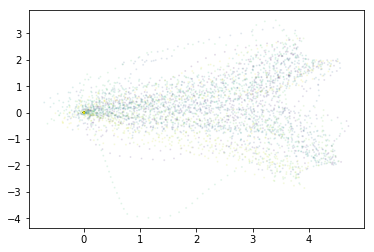

In [5]:
plt.scatter(df['x'], df['y'], s=1, c=df['event_id'], alpha = 0.1)

In [6]:
fly = []
for i in df['event_id'].unique():
    pos = []
    tmp = df[df['event_id'] == i]
    tmp = tmp.reset_index()
    for idx in range(0,len(tmp)):
        pos.append({"x":tmp.loc[idx,'y'], "y":tmp.loc[idx,'z'], "z":tmp.loc[idx,'x']})
    fly.append({"id" : int(i), "trajectory" : pos})

In [7]:
all_tracks = {"all_tracks" : fly}

In [8]:
with open('/Users/vivekhsridhar/Documents/Code/Python/fly-matrix/sparse_tracks.json', 'w') as f:
    json.dump(all_tracks, f)

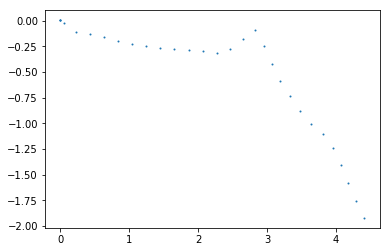

In [9]:
tmp = df[df['event_id'] == 6]

plt.scatter(tmp['x'], tmp['y'], s=1)